In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# set figure params (figure size, font size)
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=13)

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from modules.stableDT import stableDecisionTree # file 제공
from modules.stableDT import visualize_tree # file 제공
from modules.stableCRI import stable_concise_rule_induction # file 제공

In [4]:
data = pd.read_excel('data 전처리.xlsx')

```python
    'q1', # 귀하의 성별은 어떻게 되십니까? 
    'q3', # 연령 
    'q4', # 귀하의 거주지역
    'q6', # 귀하가 가장 즐겨먹는 패스트푸드 종류는 무엇입니까? 
    'q7', # 귀하가 가장 즐겨먹는 햄버거 브랜드는 무엇입니까?
    'q8', # 귀하의 패스트푸드 매장 방문 횟수 는 평균 몇 회 입니까? 
    'q9', # 패스트푸드점 1회 이용 시, 평균 지불 금액은 얼마정도 입니까?
    'q10', # 귀하는 SNS를 이용해본 경험이 있으십니까? 
    'q11', # 귀하의 SNS 총 이용기간은 어떻게 됩니까?
    'q12', # 귀하의 하루 평균 SNS 사용시간은 어느정도 입니까? 
    'q13_1', # 귀하가 자주 사용하는 SNS를 선택해주시기 바랍니다
    'q14', # 기대치가 있다 - 맛 
    'q15', # 기대치가 있다 - 가성비
    'q16', # 기대치가 있다 - 할인혜택
    'q17', # 기대치가 있다 - 내부시설상태 및 인테리어
    'q18', # 기대치가 있다 - 친절도
    'q34', # 품질을 평균적으로 점수화 - 맛
    'q35', # 품질을 평균적으로 점수화 - 가성비
    'q36', # 품질을 평균적으로 점수화 - 할인혜택
    'q37', # 품질을 평균적으로 점수화 - 내부시설상태 및 인테리어
    'q38', # 품질을 평균적으로 점수화 - 친절도 
    'q39', # 전반적인 상황을 고려했을 때, 만족 - 맛
    'q40', # 전반적인 상황을 고려했을 때, 만족 - 가성비
    'q41', # 전반적인 상황을 고려했을 때, 만족 - 할인혜택
    'q42', # 전반적인 상황을 고려했을 때, 만족 - 내부시설상태 및 인테리어
    'q43', # 전반적인 상황을 고려했을 때, 만족 - 친절도
    'q44', # 기대치 없이 당일 서비스 경험만으로 평가 - 맛
    'q45', # 기대치 없이 당일 서비스 경험만으로 평가 - 가성비
    'q46', # 기대치 없이 당일 서비스 경험만으로 평가 - 할인혜택
    'q47', # 기대치 없이 당일 서비스 경험만으로 평가 - 내부시설상태 및 인테리어
    'q48', # 기대치 없이 당일 서비스 경험만으로 평가 - 친절도
    'q94', # 햄버거 프랜차이즈 매장 이용 후,  제공받은 서비스에 대해 각 항목별 품질을 평균적으로 점수화 한다면 어떻습니까?  - 맛
    'q95', # 햄버거 프랜차이즈 매장 이용 후,  제공받은 서비스에 대해 각 항목별 품질을 평균적으로 점수화 한다면 어떻습니까?  - 가성비
    'q96', # 햄버거 프랜차이즈 매장 이용 후,  제공받은 서비스에 대해 각 항목별 품질을 평균적으로 점수화 한다면 어떻습니까?  - 할인혜택
    'q97', # 햄버거 프랜차이즈 매장 이용 후,  제공받은 서비스에 대해 각 항목별 품질을 평균적으로 점수화 한다면 어떻습니까?  - 내부시설 및 인테리어
    'q98', # 햄버거 프랜차이즈 매장 이용 후,  제공받은 서비스에 대해 각 항목별 품질을 평균적으로 점수화 한다면 어떻습니까?  - 친절도
    'q99', # 제공된 서비스에 대하여 전반적인 상황을 고려했을 때, 만족하십니까?  - 맛
    'q100', # 제공된 서비스에 대하여 전반적인 상황을 고려했을 때, 만족하십니까?  - 가성비
    'q101', # 제공된 서비스에 대하여 전반적인 상황을 고려했을 때, 만족하십니까?  - 할인혜택
    'q102', # 제공된 서비스에 대하여 전반적인 상황을 고려했을 때, 만족하십니까?  - 내부시설상태 및 인테리어
    'q103', # 제공된 서비스에 대하여 전반적인 상황을 고려했을 때, 만족하십니까?  - 친절도
    'q104', # 직업
    'q105', # 월 평균 소득
    'q106' # 월 평균 외식비 지출
    
```

<class 'pandas.core.series.Series'>
RangeIndex: 160 entries, 0 to 159
Series name: q24
Non-Null Count  Dtype  
--------------  -----  
133 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


In [15]:
data.astype

<bound method NDFrame.astype of       no  q1  q2_1  q3  q4  q5_1  q5_2  q5_3  q5_4  q5_5  ...  q98 q99  q100  \
0      1   2    47   4  10   1.0     2   3.0   4.0   NaN  ...    2   1     2   
1      2   1    59   5   5   1.0     2   3.0   NaN   NaN  ...    2   1     1   
2      3   1    30   3   2   1.0     2   3.0   4.0   NaN  ...    2   1     1   
3      4   1    27   2   1   1.0     2   3.0   4.0   NaN  ...    2   1     1   
4      5   1    54   5   4   1.0     2   3.0   4.0   NaN  ...    2   1     1   
..   ...  ..   ...  ..  ..   ...   ...   ...   ...   ...  ...  ...  ..   ...   
155  156   1    15   1   8   1.0     2   3.0   4.0   NaN  ...    1   1     1   
156  157   2    14   1   3   1.0     2   3.0   4.0   NaN  ...    2   1     2   
157  158   2    19   1   3   NaN     2   3.0   4.0   NaN  ...    2   1     1   
158  159   2    19   1   4   1.0     2   3.0   4.0   NaN  ...    1   1     1   
159  160   2    16   1   8   1.0     2   3.0   4.0   NaN  ...    2   1     2   

    q10

In [350]:
target_name ='q15'  # ★★★★★
df = data[['q1','q3','q4','q6','q7','q8','q9','q11','q12','q13_1'
                ,'q104','q105','q106',target_name]]

In [351]:
df[target_name].value_counts()

1    117
2     43
Name: q15, dtype: int64

In [352]:
df

,q1,q3,q4,q6,q7,q8,q9,q11,q12,q13_1,q104,q105,q106,q15
0,2,4,10,3,1,4,3,4,2,1,4,1,2,2
1,1,5,5,3,3,3,2,3,1,1,2,5,2,1
2,1,3,2,3,1,1,3,4,5,1,2,5,4,1
3,1,2,1,2,1,3,2,4,2,3,1,1,3,1
4,1,5,4,3,5,1,3,2,2,1,5,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,1,8,1,1,1,3,3,4,1,1,1,2,2
156,2,1,3,3,3,1,4,3,5,3,1,1,2,1
157,2,1,3,4,4,3,3,4,2,5,1,1,2,1
158,2,1,4,4,4,3,2,4,5,3,1,1,1,2


In [353]:
target_name

'q15'

In [354]:
df[['q1','q4', 'q6', 'q7', 'q13_1', 'q104']] = df[['q1','q4', 'q6', 'q7', 'q13_1', 'q104']].astype('string')

C:\Users\USER\AppData\Local\Temp\ipykernel_34304\2764102402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['q1','q4', 'q6', 'q7', 'q13_1', 'q104']] = df[['q1','q4', 'q6', 'q7', 'q13_1', 'q104']].astype('string')


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   q1      160 non-null    string
 1   q3      160 non-null    int64 
 2   q4      160 non-null    string
 3   q6      160 non-null    string
 4   q7      160 non-null    string
 5   q8      160 non-null    int64 
 6   q9      160 non-null    int64 
 7   q11     160 non-null    int64 
 8   q12     160 non-null    int64 
 9   q13_1   160 non-null    string
 10  q104    160 non-null    string
 11  q105    160 non-null    int64 
 12  q106    160 non-null    int64 
 13  q15     160 non-null    int64 
dtypes: int64(8), string(6)
memory usage: 17.6 KB


In [356]:
# 범주형 변수 one-hot-encoding
df = pd.get_dummies(df, columns = ['q1', 'q4', 'q6', 'q7', 'q13_1', 'q104'])

In [357]:
df.head()

,q3,q8,q9,q11,q12,q105,q106,q15,q1_1,q1_2,...,q13_1_5,q13_1_6,q13_1_7,q13_1_8,q104_1,q104_2,q104_3,q104_4,q104_5,q104_6
0,4,4,3,4,2,1,2,2,0,1,...,0,0,0,0,0,0,0,1,0,0
1,5,3,2,3,1,5,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,4,5,5,4,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2,3,2,4,2,1,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,1,3,2,2,5,4,2,1,0,...,0,0,0,0,0,0,0,0,1,0


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   q3       160 non-null    int64
 1   q8       160 non-null    int64
 2   q9       160 non-null    int64
 3   q11      160 non-null    int64
 4   q12      160 non-null    int64
 5   q105     160 non-null    int64
 6   q106     160 non-null    int64
 7   q15      160 non-null    int64
 8   q1_1     160 non-null    uint8
 9   q1_2     160 non-null    uint8
 10  q4_1     160 non-null    uint8
 11  q4_10    160 non-null    uint8
 12  q4_11    160 non-null    uint8
 13  q4_12    160 non-null    uint8
 14  q4_13    160 non-null    uint8
 15  q4_14    160 non-null    uint8
 16  q4_15    160 non-null    uint8
 17  q4_16    160 non-null    uint8
 18  q4_2     160 non-null    uint8
 19  q4_3     160 non-null    uint8
 20  q4_4     160 non-null    uint8
 21  q4_5     160 non-null    uint8
 22  q4_6     160 non-null    u

# DataSet Split

In [359]:
from sklearn.model_selection import train_test_split

colnm = df.columns
X = df.loc[:,colnm [colnm != target_name]]
y = df.loc[:, target_name]

---

# 1. Decision Tree

In [360]:
# randomly split into a training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)   # ★

# fitting
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=15, max_depth=4) # default : gini   # ★★★
clf_tree = clf_tree.fit(X_train,y_train)

### 1.2.1 train_result

In [361]:
from sklearn.metrics import accuracy_score
pred = clf_tree.predict(X_train)
accuracy = accuracy_score(y_train, pred)
print('예측 정확도 : {0:.4f}'.format(accuracy))

예측 정확도 : 0.7188


In [362]:
from sklearn.metrics import confusion_matrix
# confusion matrix
cm = confusion_matrix(y_train, pred)
print(cm)

[[92  0]
 [36  0]]


### 1.2.2 test_result

In [363]:
from sklearn.metrics import accuracy_score
pred = clf_tree.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('예측 정확도 : {0:.4f}'.format(accuracy))

예측 정확도 : 0.7812


In [364]:
from sklearn.metrics import confusion_matrix
# confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[25  0]
 [ 7  0]]


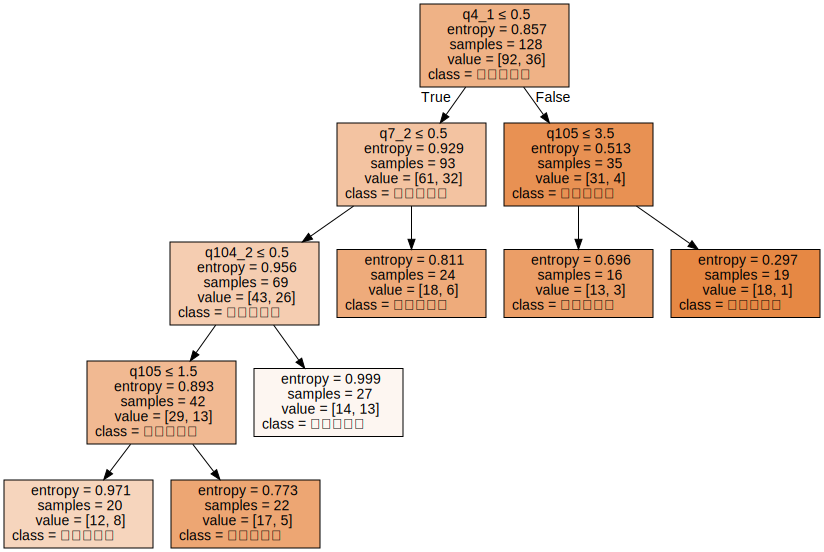

In [365]:
import graphviz
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['기대치있다','기대치없다'],  # ★★★
                      filled=True, rounded=False,
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

---

# 2. Stable CRI

## 2.1 Fitting
- params
    - min_samples : OSM 트리에서 리프 노드의 min_samples
    - max_depth : OSM 트리의 max depth
    - rule_rate : rule generation 시 rule들이 커버할 training dataset의 비율 (concise 후에는 달라질 수 있음)
    - iter_num : node에서 rule 유도 시 리샘플링 횟수
    - target_name : 목표 변수의 column명
- 범주형 변수는 숫자로 바꿔주는 전처리를 해도 되고, 안해도 됨
- 매우 느립니다. 어쩌면 하루가 넘게 걸릴 수도 있습니다.
- 실행이 오래 걸린다면 iter_num을 낮춰서 해보시기 바랍니다. 실행이 너무 오래 걸린다면 데이터셋을 잘 줄여서 해보시기 바랍니다.
- 실행 시간이 오래 소요되지 않는다면 별 다른 제약 없이 min_samples만 training dataset의 3%로 설정하고 수행

In [366]:
from sklearn.model_selection import train_test_split

colnm = df.columns
X = df.loc[:,colnm [colnm != target_name]]
y = df.loc[:, target_name]

In [367]:
X 

,q3,q8,q9,q11,q12,q105,q106,q1_1,q1_2,q4_1,...,q13_1_5,q13_1_6,q13_1_7,q13_1_8,q104_1,q104_2,q104_3,q104_4,q104_5,q104_6
0,4,4,3,4,2,1,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,5,3,2,3,1,5,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,4,5,5,4,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,3,2,4,2,1,3,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,1,3,2,2,5,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,1,3,3,4,1,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
156,1,1,4,3,5,1,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
157,1,3,3,4,2,1,2,0,1,0,...,1,0,0,0,1,0,0,0,0,0
158,1,3,2,4,5,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [368]:
y

0      2
1      1
2      1
3      1
4      2
      ..
155    2
156    1
157    1
158    2
159    1
Name: q15, Length: 160, dtype: int64

In [369]:
# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = df.loc[train_idx,:], df.loc[test_idx,:]

In [370]:
df_train

,q3,q8,q9,q11,q12,q105,q106,q15,q1_1,q1_2,...,q13_1_5,q13_1_6,q13_1_7,q13_1_8,q104_1,q104_2,q104_3,q104_4,q104_5,q104_6
158,1,3,2,4,5,1,1,2,0,1,...,0,0,0,0,1,0,0,0,0,0
49,5,3,3,4,1,2,1,2,1,0,...,0,0,0,0,0,0,0,0,0,1
68,5,2,2,4,2,3,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,1,3,4,5,5,4,1,1,0,...,0,0,0,0,0,1,0,0,0,0
59,4,3,2,2,2,3,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,3,2,2,4,4,5,3,1,1,0,...,0,0,0,0,0,1,0,0,0,0
64,5,3,5,4,2,4,4,1,1,0,...,0,0,0,0,0,1,0,0,0,0
15,3,3,3,4,4,3,2,2,0,1,...,1,0,0,0,0,1,0,0,0,0
125,2,2,3,4,2,4,3,2,0,1,...,0,0,0,0,0,0,1,0,0,0


In [371]:
df_test

,q3,q8,q9,q11,q12,q105,q106,q15,q1_1,q1_2,...,q13_1_5,q13_1_6,q13_1_7,q13_1_8,q104_1,q104_2,q104_3,q104_4,q104_5,q104_6
35,5,4,3,4,3,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
132,2,4,3,4,4,2,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
47,1,4,2,3,4,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
24,5,4,3,4,1,5,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0
90,1,4,2,4,1,1,2,1,0,1,...,1,0,0,0,1,0,0,0,0,0
138,1,2,3,3,4,1,2,1,1,0,...,1,0,0,0,1,0,0,0,0,0
129,3,3,2,4,3,4,3,1,0,1,...,0,0,0,0,0,1,0,0,0,0
10,4,2,2,4,1,3,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
58,2,2,2,1,2,3,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
105,1,3,2,4,3,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0


In [372]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

min_sample_ratio = 0.01 #★★★★★
min_samples = round(min_sample_ratio * len(df_train)) 
max_depth = 100 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다. #★

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 10, rule_rate = 0.9)   #★★★★★

C:\Users\USER\Desktop\e-class\[기타] 2022-2 캡스톤디자인 - 홍정식\데이터분석\modules\stableCRI.py:495: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_d.loc[:] = self.multi_to_integer(y_train_d)


# 2.2 Result

### 2.2.1 train_result

In [373]:
# predictive performance
# f1 : macro-averaging for multiclass
pred_y, acc, f1 = cri.predict(df_train)
acc,f1

C:\Users\USER\Desktop\e-class\[기타] 2022-2 캡스톤디자인 - 홍정식\데이터분석\modules\stableCRI.py:541: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:] = self.multi_to_integer(y)


(0.8359, 0.763)

In [374]:
from sklearn.metrics import confusion_matrix
# confusion matrix
cm = confusion_matrix(y_train, pred_y)
print(cm)

[[89  3]
 [18 18]]


### 2.2.2 test_result

In [375]:
# predictive performance
# f1 : macro-averaging for multiclass
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

C:\Users\USER\Desktop\e-class\[기타] 2022-2 캡스톤디자인 - 홍정식\데이터분석\modules\stableCRI.py:541: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:] = self.multi_to_integer(y)


(0.6875, 0.4074)

In [376]:
from sklearn.metrics import confusion_matrix
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[22  3]
 [ 7  0]]


### 2.2.3 Cri-Rule Result

In [377]:
# rules
cri.export_text()

IF ['q104_5 >= 0.5'] THEN q15 = 1   (homogeneity = 0.8571 , coverage = 0.0547 )
IF ['q9 >= 3.5'] THEN q15 = 1   (homogeneity = 0.9091 , coverage = 0.0859 )
IF ['q6_1 >= 0.5'] THEN q15 = 1   (homogeneity = 0.7273 , coverage = 0.0859 )
IF ['q4_1 >= 0.5'] THEN q15 = 1   (homogeneity = 0.8857 , coverage = 0.2734 )
IF ['q11 < 2.5'] THEN q15 = 1   (homogeneity = 0.75 , coverage = 0.0938 )
IF ['q6_4 >= 0.5'] THEN q15 = 1   (homogeneity = 0.7826 , coverage = 0.1797 )
IF ['q104_5 < 0.5', 'q9 < 3.5', 'q7_5 >= 0.5'] THEN q15 = 2   (homogeneity = 1.0 , coverage = 0.0156 )
IF ['q104_5 < 0.5', 'q9 < 3.5', 'q6_1 < 0.5', 'q4_1 < 0.5', 'q11 >= 2.5', 'q6_4 < 0.5', 'q7_5 < 0.5', 'q104_6 >= 0.5'] THEN q15 = 1   (homogeneity = 1.0 , coverage = 0.0156 )
IF ['q12 < 1.5'] THEN q15 = 1   (homogeneity = 0.6842 , coverage = 0.1484 )
IF ['q13_1_3 >= 0.5'] THEN q15 = 1   (homogeneity = 0.7143 , coverage = 0.1094 )
IF ['q104_5 < 0.5', 'q9 < 3.5', 'q6_1 < 0.5', 'q4_1 < 0.5', 'q11 >= 2.5', 'q6_4 < 0.5', 'q7_5 < 0.5',

---